<h1>Proyecto 2 – Modelos de clasificación supervisada para evaluar la calidad de un automovil</h1>
Presentado por:
<ul>
  <li>Henry Ragua</li>
  <li>Gilberto Botia</li>
</ul>
<p>
Se tiene una base de datos categórica de 6 características de distintas líneas de automóviles que buscan determinar la aceptación del vehículo en el mercado si es inaceptable, aceptable, bueno, muy bueno.
</p>
<p>
Se buscará encontrar un modelo para predecir que con ciertas características de un carro su aceptabilidad en el mercado.
</p>

In [1]:
# se importan las librerías
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

Se carga el archivo .dat agregando la definición de las columnas según la documentación

In [2]:
# carga en un dataframe lo contenido en el archivo car.data, definiendo las columnas
df = pd.read_csv('car.data', header=None, names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'])
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
# se visualiza la información general de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [5]:
# al ver que todas las columnas son categóricas, se imprimen los posibles valores para todas las columnas
print(df['buying'].unique())
print(df['maint'].unique())
print(df['doors'].unique())
print(df['persons'].unique())
print(df['lug_boot'].unique())
print(df['safety'].unique())
print(df['class'].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


Se encuentra que es una base de datos con 7 columnas categóricas y que no tienen valores nulos, ni tampoco valores que no correspondan a sus dominios, se describe sus columnas:
<ul>
  <li><b>buying:</b> Precio de compra, opciones: 'vhigh', 'high', 'med', 'low'</li>
  <li><b>maint:</b> Precio del mantenimiento, opciones: 'vhigh', 'high', 'med', 'low'</li>
  <li><b>doors:</b> Número de puertas, opciones: '2', '3', '4', '5more'</li>
  <li><b>persons:</b> Capacidad en términos de personas para llevar, opciones: '2', '4', 'more'</li>
  <li><b>lug_boot:</b> Tamaño de la baúl de equipaje, opciones: 'small', 'med', 'big'</li>
  <li><b>safety:</b> Seguridad estimada del coche, opciones: 'low', 'med', 'high'</li>
  <li><b>class:</b> Nivel de aceptación, opciones: 'unacc', 'acc', 'vgood', 'good'</li>
</ul>

Generamos la grafica de conteo de la categoria "buying" respecto a nuestra variable objetivo "class labels"

<Axes: xlabel='buying', ylabel='count'>

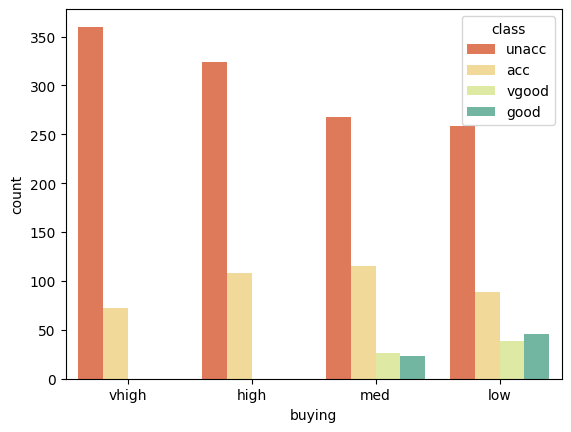

In [6]:
sns.countplot(data=df, x='buying', palette="Spectral",hue="class")

Generamos la grafica de conteo de la categoria "maint" respecto a nuestra variable objetivo "class labels"

<Axes: xlabel='maint', ylabel='count'>

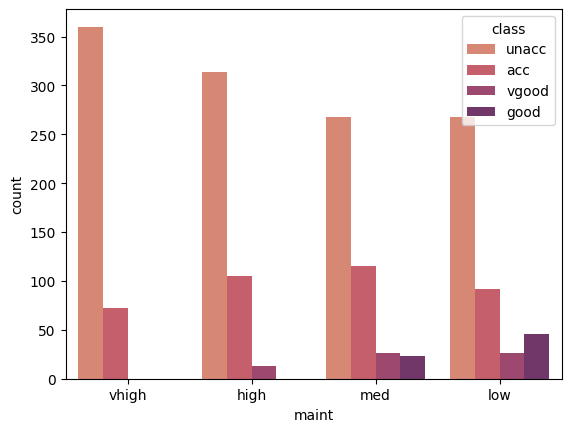

In [7]:
sns.countplot(data=df, x='maint', palette="flare",hue="class")

Generamos la grafica de conteo de la categoria "doors" respecto a nuestra variable objetivo "class labels"

<Axes: xlabel='doors', ylabel='count'>

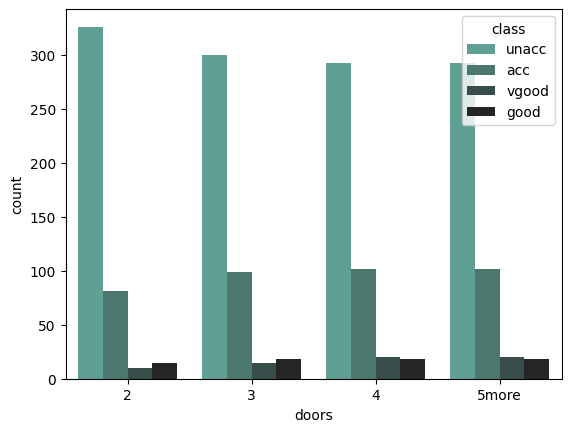

In [8]:
sns.countplot(data=df, x='doors', palette="dark:#5A9_r",hue="class")

Generamos la grafica de conteo de la categoria "persons" respecto a nuestra variable objetivo "class labels"

<Axes: xlabel='persons', ylabel='count'>

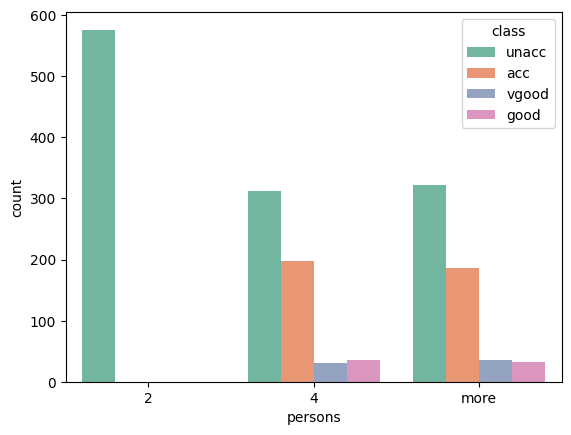

In [9]:
sns.countplot(data=df, x='persons', palette="Set2",hue="class")

Generamos la grafica de conteo de la categoria "lug_boot" respecto a nuestra variable objetivo "class labels"

<Axes: xlabel='lug_boot', ylabel='count'>

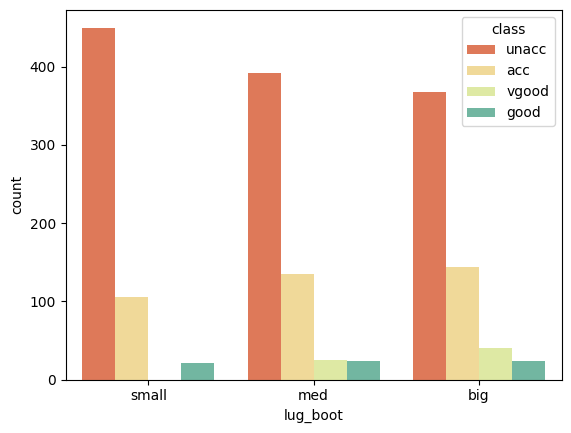

In [10]:
sns.countplot(data=df, x='lug_boot', palette="Spectral",hue="class")

Generamos la grafica de conteo de la categoria "safety" respecto a nuestra variable objetivo "class labels"

<Axes: xlabel='safety', ylabel='count'>

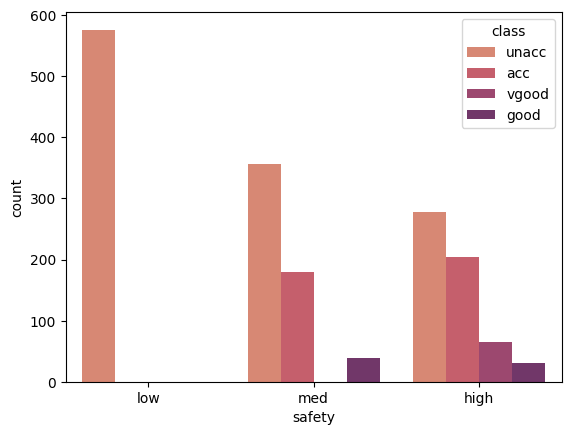

In [11]:
sns.countplot(data=df, x='safety', palette="flare",hue="class")

In [12]:
# para conveniencia de los algoritmos de clasificación en Scikit learn,
# se transforman las variables categóricas a numéricas
numeric_df = df.copy()
le = LabelEncoder()
for i in range(len(df.columns)):
  numeric_df.iloc[:, i] = le.fit_transform(df.iloc[:, i])
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Ya podemos ver que nuestra variable objetivo se toma como un número, lo cual hay que tener en cuenta, que los valores que identifica cada número son:

*   'unacc': 0,
*   'acc': 1,
*   'good': 2,
*   'vgood': 3

In [13]:
# se crean los elementos de las características y la variable a predecir
X = numeric_df.drop('class', axis=1)
y = pd.to_numeric(numeric_df['class'])

print(X.head())
print(y.head())

  buying maint doors persons lug_boot safety
0      3     3     0       0        2      1
1      3     3     0       0        2      2
2      3     3     0       0        2      0
3      3     3     0       0        1      1
4      3     3     0       0        1      2
0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64


A continuación se van a ejecutar distintos modelos de clasificación para poder hallar la mejor alternativa para predecir la aceptabilidad de los carros, a partir de las características contempladas en el Proyecto

<h1>Regresión Logística</h1>

In [14]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
# se crea la función para ejecutar las regresiones logísticas
def regresion_logistica(X, y):
  '''Retorna el score y el error absoluto de la regresión logística'''
  # se obtienen los elementos para el entrenamiento y las pruebas
  train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0, train_size=0.8, test_size=0.2)
  # se crea el pipeline con los pasos de la estandarización de los datos y la regresión logística
  pipe = make_pipeline(StandardScaler(), LogisticRegression())
  # se entrena el modelo
  pipe.fit(train_X, train_y)
  # se ejecuta la predicción
  y_pred = pipe.predict(val_X)
  # se obtienen los scores y el error absoluto
  mean_logreg = mean_absolute_error(val_y, y_pred)
  score_logreg = pipe.score(val_X, val_y)
  cm = confusion_matrix(val_y, y_pred)
  ConfusionMatrixDisplay(confusion_matrix=cm).plot();
  return score_logreg, mean_logreg

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')
MEAN = 0.6358381502890174, Score = 0.6502890173410405
********************************************
Index(['buying', 'maint', 'doors', 'persons', 'lug_boot'], dtype='object')
MEAN = 0.638728323699422, Score = 0.653179190751445
********************************************
Index(['buying', 'maint', 'doors', 'persons'], dtype='object')
MEAN = 0.6040462427745664, Score = 0.6647398843930635
********************************************
Index(['buying', 'maint', 'doors'], dtype='object')
MEAN = 0.5346820809248555, Score = 0.6936416184971098
********************************************
Index(['buying', 'maint'], dtype='object')
MEAN = 0.5346820809248555, Score = 0.6936416184971098
********************************************
Index(['buying'], dtype='object')
MEAN = 0.5346820809248555, Score = 0.6936416184971098
********************************************


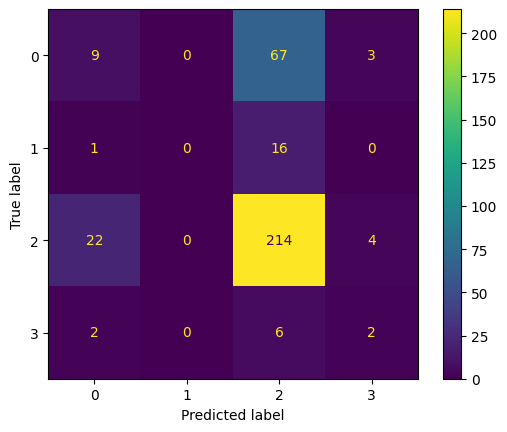

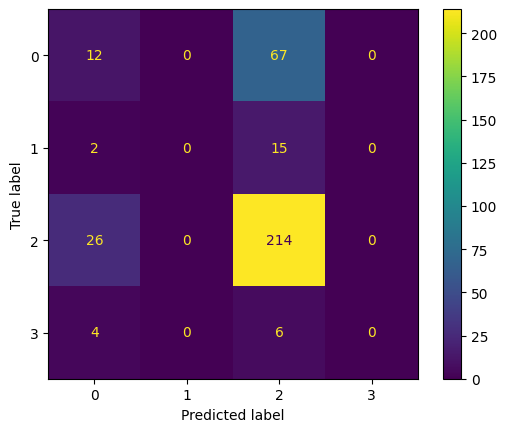

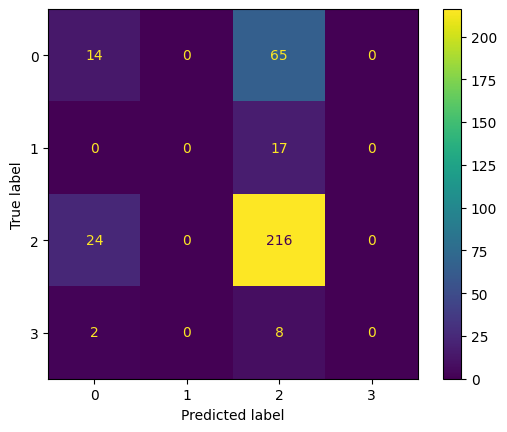

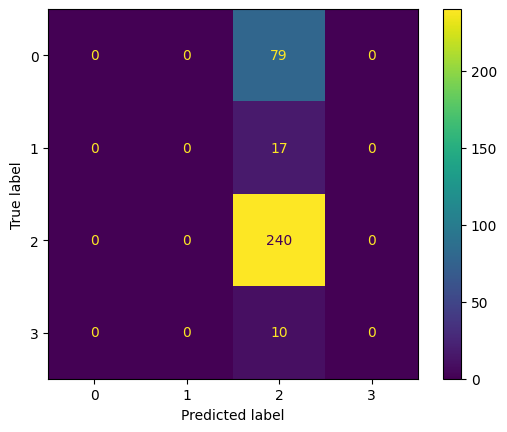

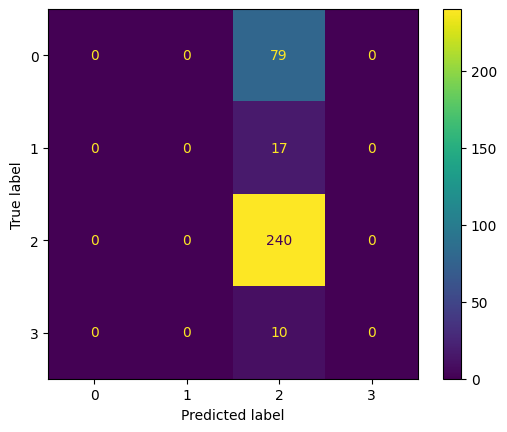

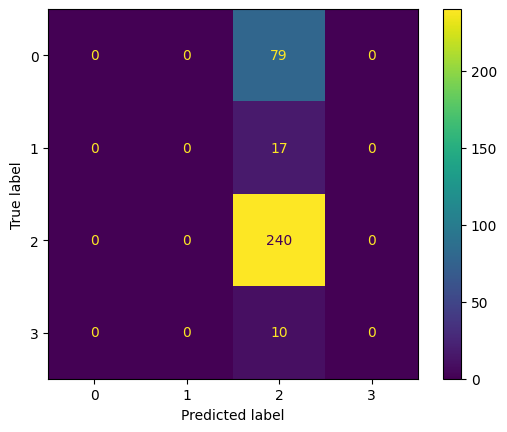

In [15]:
opciones = [
    X,
    X[['buying', 'maint', 'doors', 'persons', 'lug_boot']],
    X[['buying', 'maint', 'doors', 'persons']],
    X[['buying', 'maint', 'doors']],
    X[['buying', 'maint']],
    X[['buying']],
]
for opcion in opciones:
  score, mean = regresion_logistica(X=opcion, y=y)
  print(opcion.columns)
  print(f'MEAN = {mean}, Score = {score}')
  print('********************************************')

Como conclusión se tma que la mejor alternativa para este modelo es cuando se tiene en cuenta las características de 'buying', 'maint' y 'doors'. Pero aún así el score es muy bajito y muy alto el valor absoluto del error medio.

*   Score = 0.6936
*   Elemento de la lista = 0.53468



<h2>Árboles de Decisión</h2>

In [16]:
# se crea el modelo de predicción de arbol de decisión
from sklearn.tree import DecisionTreeClassifier
# se crea la función que ejecuta el modelo para un conjunto de datos con una profundidad de arbol
def run_decision_tree_model(X, y, max_depth):
  '''ejecuta el modelo de predicción de árbol, retornando los score de entrenamiento y test'''
  train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0, train_size=0.8, test_size=0.2)
  arbol = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, random_state=1)
  arbol.fit(train_X, train_y)
  # se evalua el modelo
  score_test = arbol.score(val_X, val_y)
  score_train = arbol.score(train_X, train_y)
  # se obtiene el error absoluto medio
  y_pred = arbol.predict(val_X)
  mean_tree = mean_absolute_error(val_y, y_pred)
  cm = confusion_matrix(val_y, y_pred)
  ConfusionMatrixDisplay(confusion_matrix=cm).plot();
  return score_test, score_train, mean_tree

Al tener esta funciónn definida podemos ejecutar el mismo modelo las veces que sean necesarias para encontrar el mejor score del mismo

max_depth = 1, score_test = 0.6936416184971098, score_train = 0.7018813314037626, MEAN = 0.5346820809248555
max_depth = 2, score_test = 0.7687861271676301, score_train = 0.7691751085383502, MEAN = 0.4421965317919075
max_depth = 3, score_test = 0.7630057803468208, score_train = 0.784370477568741, MEAN = 0.45375722543352603
max_depth = 4, score_test = 0.8034682080924855, score_train = 0.8306801736613604, MEAN = 0.37283236994219654
max_depth = 5, score_test = 0.8583815028901735, score_train = 0.8762662807525325, MEAN = 0.2832369942196532
max_depth = 6, score_test = 0.8583815028901735, score_train = 0.8986975397973951, MEAN = 0.2543352601156069


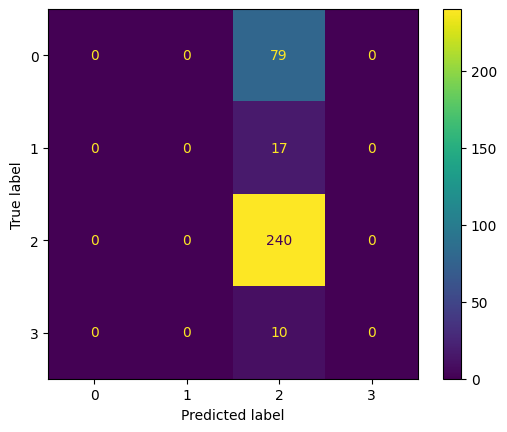

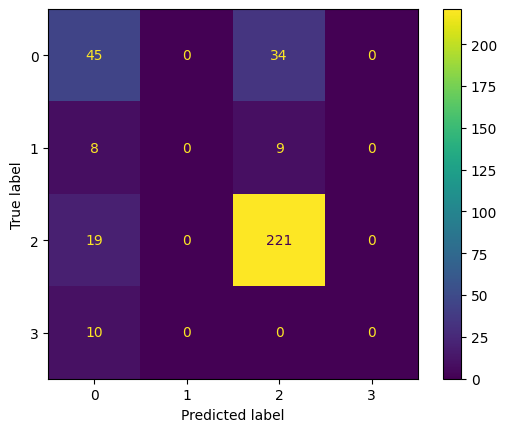

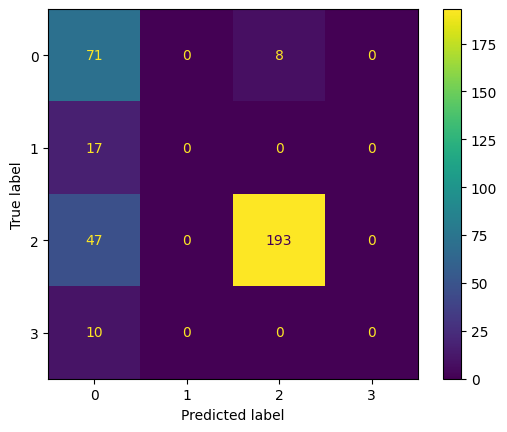

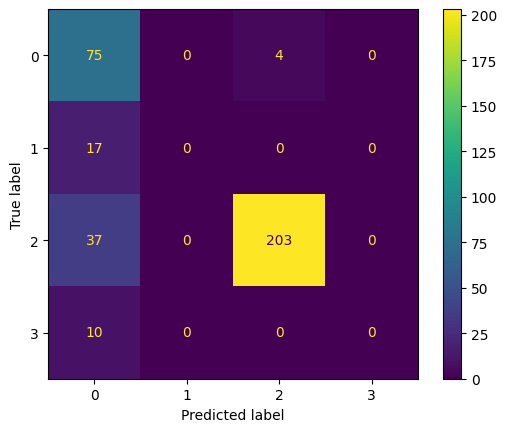

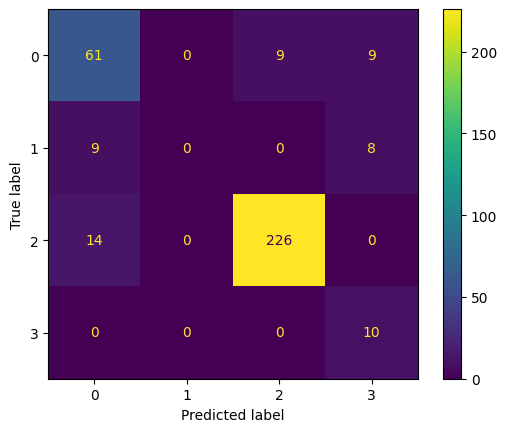

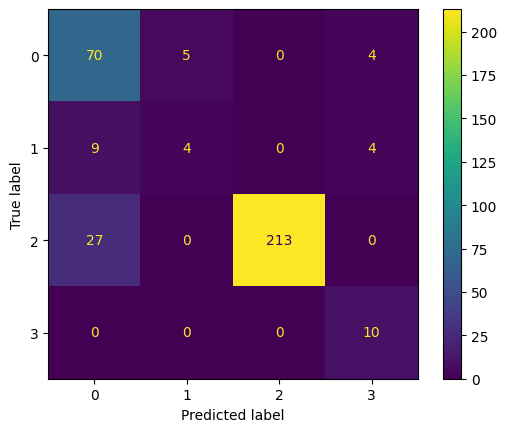

In [17]:
# se prueba el modelo con diferentes opciones de profundidad de árbol
max_depths = [1, 2, 3, 4, 5, 6]
for max_depth in max_depths:
  score_test, score_train, mean_tree = run_decision_tree_model(X, y, max_depth)
  print(f'max_depth = {max_depth}, score_test = {score_test}, score_train = {score_train}, MEAN = {mean_tree}')

Con este modelo se consiguen mejores resultados en cuanto al score y al error absoluto medio es cuando se ejecuta el modelo de decisión de árboles con una profundidad de 6 nodos. Dando como resultado:

*   Score: 0.8584
*   Error absoluto medio: 0.2543



<h2>Random Forest</h2>

In [18]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.tree import export_graphviz

def run_random_forest_model(X, y):
  train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0, train_size=0.8, test_size=0.2)
  arbol = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=1)
  arbol.fit(train_X, train_y)
  # Crear el modelo con 100 arboles
  bosque = RandomForestClassifier(n_estimators=10, bootstrap = True, verbose=2, max_features = 'sqrt')
  # a entrenar!
  bosque.fit(train_X, train_y)
  # se evalua el modelo
  score_test_forest = bosque.score(val_X, val_y)
  score_train_forest = bosque.score(train_X, train_y)
  y_pred = bosque.predict(val_X)
  mean_forest = mean_absolute_error(val_y, y_pred)
  #creamos rangos de 'n_estimators' (numero de arboles) y 'max_depth' (profundidad  maxima)
  param_dist = {'n_estimators': randint(50,100),'max_depth': randint(1,6)}
  # Utilizamos la búsqueda aleatoria para encontrar los mejores hiperparámetros
  rand_search = RandomizedSearchCV(bosque,param_distributions = param_dist, n_iter=5, cv=5)
  # Ajustamos el objeto de búsqueda aleatoria a los datos
  rand_search.fit(train_X, train_y)
  #creamos una variable para tener el mejor modelo respecto a su valores de estimacion
  best_rf = rand_search.best_estimator_
  # Generamos las predicciones con el mejor modelo
  y_pred_best = best_rf.predict(val_X)
  # se evalua el modelo
  score_test_forest_best = rand_search.score(val_X, val_y)
  score_train_forest_best = rand_search.score(train_X, train_y)
  mean_forest_best = mean_absolute_error(val_y, y_pred_best)
  # creamos la matriz de confusion
  cm = confusion_matrix(val_y, y_pred_best)
  ConfusionMatrixDisplay(confusion_matrix=cm).plot();
  return score_test_forest, score_train_forest, mean_forest, score_test_forest_best, score_train_forest_best, mean_forest_best


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
buildi

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50
building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50
building tree 1 of 74
building tree 2 of 74
building tree 3 of 74
building tree 4 of 74
building tree 5 of 74
building tree 6 of 74
building tree 7 of 74
building tree 8 of 74
building tree 9 of 74
building tree 10 of 74
building tree 11 of 74
building tree 12 of 74
building tree 13 of 74
building tree 14 of 74
building tree 15 of 74
building tree 16 of 74
building tree 17 of 74
building tree 18 of 74
building tree 19 of 74
building tree 20 of 74
building tree 21 of 74
building tree 22 of 74
building tree 23 of 74
building tree 24 of 74
building tree 25 of 74
building tree 26 of 74
building tree 27 of 74
building tree 28 of 74
building tree 29 of 74
building tree 30 of 74
building tree 31 of 74
building tree 32 of 74
building tree 33 of 74
building tree 34 of 74
building tree 35 of 74
building tree 36 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 74
building tree 2 of 74
building tree 3 of 74
building tree 4 of 74
building tree 5 of 74
building tree 6 of 74
building tree 7 of 74
building tree 8 of 74
building tree 9 of 74
building tree 10 of 74
building tree 11 of 74
building tree 12 of 74
building tree 13 of 74
building tree 14 of 74
building tree 15 of 74
building tree 16 of 74
building tree 17 of 74
building tree 18 of 74
building tree 19 of 74
building tree 20 of 74
building tree 21 of 74
building tree 22 of 74
building tree 23 of 74
building tree 24 of 74
building tree 25 of 74
building tree 26 of 74
building tree 27 of 74
building tree 28 of 74
building tree 29 of 74
building tree 30 of 74
building tree 31 of 74
building tree 32 of 74
building tree 33 of 74
building tree 34 of 74
building tree 35 of 74
building tree 36 of 74
building tree 37 of 74
building tree 38 of 74
building tree 39 of 74
building tree 40 of 74
building tree 41 of 74
building tree 42 of 74
building tree 43 of 74
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s



building tree 65 of 74
building tree 66 of 74
building tree 67 of 74
building tree 68 of 74
building tree 69 of 74
building tree 70 of 74
building tree 71 of 74
building tree 72 of 74
building tree 73 of 74
building tree 74 of 74
building tree 1 of 74
building tree 2 of 74
building tree 3 of 74
building tree 4 of 74


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 5 of 74
building tree 6 of 74
building tree 7 of 74
building tree 8 of 74
building tree 9 of 74
building tree 10 of 74
building tree 11 of 74
building tree 12 of 74
building tree 13 of 74
building tree 14 of 74
building tree 15 of 74
building tree 16 of 74
building tree 17 of 74
building tree 18 of 74
building tree 19 of 74
building tree 20 of 74
building tree 21 of 74
building tree 22 of 74
building tree 23 of 74
building tree 24 of 74
building tree 25 of 74
building tree 26 of 74
building tree 27 of 74
building tree 28 of 74
building tree 29 of 74
building tree 30 of 74
building tree 31 of 74
building tree 32 of 74
building tree 33 of 74
building tree 34 of 74
building tree 35 of 74
building tree 36 of 74
building tree 37 of 74
building tree 38 of 74
building tree 39 of 74
building tree 40 of 74
building tree 41 of 74
building tree 42 of 74
building tree 43 of 74
building tree 44 of 74
building tree 45 of 74
building tree 46 of 74
building tree 47 of 74


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s


building tree 48 of 74
building tree 49 of 74
building tree 50 of 74
building tree 51 of 74
building tree 52 of 74
building tree 53 of 74
building tree 54 of 74
building tree 55 of 74
building tree 56 of 74
building tree 57 of 74
building tree 58 of 74
building tree 59 of 74
building tree 60 of 74
building tree 61 of 74
building tree 62 of 74
building tree 63 of 74
building tree 64 of 74
building tree 65 of 74
building tree 66 of 74
building tree 67 of 74
building tree 68 of 74
building tree 69 of 74
building tree 70 of 74
building tree 71 of 74
building tree 72 of 74
building tree 73 of 74
building tree 74 of 74
building tree 1 of 74
building tree 2 of 74
building tree 3 of 74
building tree 4 of 74
building tree 5 of 74
building tree 6 of 74
building tree 7 of 74
building tree 8 of 74
building tree 9 of 74
building tree 10 of 74
building tree 11 of 74
building tree 12 of 74
building tree 13 of 74
building tree 14 of 74
building tree 15 of 74
building tree 16 of 74
building tree 17 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 22 of 74
building tree 23 of 74
building tree 24 of 74
building tree 25 of 74
building tree 26 of 74
building tree 27 of 74
building tree 28 of 74
building tree 29 of 74
building tree 30 of 74
building tree 31 of 74
building tree 32 of 74
building tree 33 of 74
building tree 34 of 74
building tree 35 of 74
building tree 36 of 74
building tree 37 of 74
building tree 38 of 74
building tree 39 of 74
building tree 40 of 74
building tree 41 of 74
building tree 42 of 74
building tree 43 of 74
building tree 44 of 74
building tree 45 of 74
building tree 46 of 74
building tree 47 of 74
building tree 48 of 74
building tree 49 of 74
building tree 50 of 74
building tree 51 of 74
building tree 52 of 74
building tree 53 of 74


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


building tree 54 of 74
building tree 55 of 74
building tree 56 of 74
building tree 57 of 74
building tree 58 of 74
building tree 59 of 74
building tree 60 of 74
building tree 61 of 74
building tree 62 of 74
building tree 63 of 74
building tree 64 of 74
building tree 65 of 74
building tree 66 of 74
building tree 67 of 74
building tree 68 of 74
building tree 69 of 74
building tree 70 of 74
building tree 71 of 74
building tree 72 of 74
building tree 73 of 74
building tree 74 of 74


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 74
building tree 2 of 74
building tree 3 of 74
building tree 4 of 74
building tree 5 of 74
building tree 6 of 74
building tree 7 of 74
building tree 8 of 74
building tree 9 of 74
building tree 10 of 74
building tree 11 of 74
building tree 12 of 74
building tree 13 of 74
building tree 14 of 74
building tree 15 of 74
building tree 16 of 74
building tree 17 of 74
building tree 18 of 74
building tree 19 of 74
building tree 20 of 74
building tree 21 of 74
building tree 22 of 74
building tree 23 of 74
building tree 24 of 74
building tree 25 of 74
building tree 26 of 74
building tree 27 of 74
building tree 28 of 74
building tree 29 of 74
building tree 30 of 74
building tree 31 of 74
building tree 32 of 74
building tree 33 of 74
building tree 34 of 74
building tree 35 of 74
building tree 36 of 74
building tree 37 of 74
building tree 38 of 74
building tree 39 of 74
building tree 40 of 74
building tree 41 of 74
building tree 42 of 74
building tree 43 of 74
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.4s



building tree 45 of 74
building tree 46 of 74
building tree 47 of 74
building tree 48 of 74
building tree 49 of 74
building tree 50 of 74
building tree 51 of 74
building tree 52 of 74
building tree 53 of 74
building tree 54 of 74
building tree 55 of 74
building tree 56 of 74
building tree 57 of 74
building tree 58 of 74
building tree 59 of 74
building tree 60 of 74
building tree 61 of 74
building tree 62 of 74
building tree 63 of 74
building tree 64 of 74
building tree 65 of 74
building tree 66 of 74
building tree 67 of 74
building tree 68 of 74
building tree 69 of 74
building tree 70 of 74
building tree 71 of 74
building tree 72 of 74
building tree 73 of 74
building tree 74 of 74
building tree 1 of 64
building tree 2 of 64
building tree 3 of 64
building tree 4 of 64
building tree 5 of 64


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 6 of 64
building tree 7 of 64
building tree 8 of 64
building tree 9 of 64
building tree 10 of 64
building tree 11 of 64
building tree 12 of 64
building tree 13 of 64
building tree 14 of 64
building tree 15 of 64
building tree 16 of 64
building tree 17 of 64
building tree 18 of 64
building tree 19 of 64
building tree 20 of 64
building tree 21 of 64
building tree 22 of 64
building tree 23 of 64
building tree 24 of 64
building tree 25 of 64
building tree 26 of 64
building tree 27 of 64
building tree 28 of 64
building tree 29 of 64
building tree 30 of 64
building tree 31 of 64
building tree 32 of 64
building tree 33 of 64
building tree 34 of 64
building tree 35 of 64
building tree 36 of 64
building tree 37 of 64
building tree 38 of 64
building tree 39 of 64
building tree 40 of 64
building tree 41 of 64
building tree 42 of 64
building tree 43 of 64
building tree 44 of 64
building tree 45 of 64
building tree 46 of 64
building tree 47 of 64
building tree 48 of 64
building tree 4

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 18 of 64
building tree 19 of 64
building tree 20 of 64
building tree 21 of 64
building tree 22 of 64
building tree 23 of 64
building tree 24 of 64
building tree 25 of 64
building tree 26 of 64
building tree 27 of 64
building tree 28 of 64
building tree 29 of 64
building tree 30 of 64
building tree 31 of 64
building tree 32 of 64
building tree 33 of 64
building tree 34 of 64
building tree 35 of 64
building tree 36 of 64
building tree 37 of 64
building tree 38 of 64
building tree 39 of 64
building tree 40 of 64
building tree 41 of 64
building tree 42 of 64
building tree 43 of 64
building tree 44 of 64
building tree 45 of 64
building tree 46 of 64
building tree 47 of 64
building tree 48 of 64
building tree 49 of 64
building tree 50 of 64
building tree 51 of 64
building tree 52 of 64
building tree 53 of 64
building tree 54 of 64
building tree 55 of 64
building tree 56 of 64
building tree 57 of 64
building tree 58 of 64
building tree 59 of 64
building tree 60 of 64
building tr

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 64
building tree 2 of 64
building tree 3 of 64
building tree 4 of 64
building tree 5 of 64
building tree 6 of 64
building tree 7 of 64
building tree 8 of 64
building tree 9 of 64
building tree 10 of 64
building tree 11 of 64
building tree 12 of 64
building tree 13 of 64
building tree 14 of 64
building tree 15 of 64
building tree 16 of 64
building tree 17 of 64
building tree 18 of 64
building tree 19 of 64
building tree 20 of 64
building tree 21 of 64
building tree 22 of 64
building tree 23 of 64
building tree 24 of 64
building tree 25 of 64
building tree 26 of 64
building tree 27 of 64
building tree 28 of 64
building tree 29 of 64
building tree 30 of 64
building tree 31 of 64
building tree 32 of 64
building tree 33 of 64
building tree 34 of 64
building tree 35 of 64
building tree 36 of 64
building tree 37 of 64
building tree 38 of 64
building tree 39 of 64
building tree 40 of 64
building tree 41 of 64
building tree 42 of 64
building tree 43 of 64
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


building tree 1 of 64
building tree 2 of 64
building tree 3 of 64
building tree 4 of 64
building tree 5 of 64
building tree 6 of 64
building tree 7 of 64
building tree 8 of 64
building tree 9 of 64
building tree 10 of 64
building tree 11 of 64
building tree 12 of 64
building tree 13 of 64
building tree 14 of 64
building tree 15 of 64
building tree 16 of 64
building tree 17 of 64
building tree 18 of 64
building tree 19 of 64
building tree 20 of 64
building tree 21 of 64
building tree 22 of 64
building tree 23 of 64
building tree 24 of 64
building tree 25 of 64
building tree 26 of 64
building tree 27 of 64
building tree 28 of 64
building tree 29 of 64
building tree 30 of 64
building tree 31 of 64
building tree 32 of 64
building tree 33 of 64
building tree 34 of 64
building tree 35 of 64
building tree 36 of 64
building tree 37 of 64
building tree 38 of 64
building tree 39 of 64
building tree 40 of 64
building tree 41 of 64
building tree 42 of 64
building tree 43 of 64
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 12 of 64
building tree 13 of 64
building tree 14 of 64
building tree 15 of 64
building tree 16 of 64
building tree 17 of 64
building tree 18 of 64
building tree 19 of 64
building tree 20 of 64
building tree 21 of 64
building tree 22 of 64
building tree 23 of 64
building tree 24 of 64
building tree 25 of 64
building tree 26 of 64
building tree 27 of 64
building tree 28 of 64
building tree 29 of 64
building tree 30 of 64
building tree 31 of 64
building tree 32 of 64
building tree 33 of 64
building tree 34 of 64
building tree 35 of 64
building tree 36 of 64
building tree 37 of 64
building tree 38 of 64
building tree 39 of 64
building tree 40 of 64
building tree 41 of 64
building tree 42 of 64
building tree 43 of 64
building tree 44 of 64
building tree 45 of 64
building tree 46 of 64
building tree 47 of 64
building tree 48 of 64
building tree 49 of 64
building tree 50 of 64
building tree 51 of 64
building tree 52 of 64
building tree 53 of 64
building tree 54 of 64
building tr

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 95
building tree 2 of 95
building tree 3 of 95
building tree 4 of 95
building tree 5 of 95
building tree 6 of 95
building tree 7 of 95
building tree 8 of 95
building tree 9 of 95
building tree 10 of 95
building tree 11 of 95
building tree 12 of 95
building tree 13 of 95
building tree 14 of 95
building tree 15 of 95
building tree 16 of 95
building tree 17 of 95
building tree 18 of 95
building tree 19 of 95
building tree 20 of 95
building tree 21 of 95
building tree 22 of 95
building tree 23 of 95
building tree 24 of 95
building tree 25 of 95
building tree 26 of 95
building tree 27 of 95
building tree 28 of 95
building tree 29 of 95
building tree 30 of 95
building tree 31 of 95
building tree 32 of 95
building tree 33 of 95
building tree 34 of 95
building tree 35 of 95
building tree 36 of 95
building tree 37 of 95
building tree 38 of 95
building tree 39 of 95
building tree 40 of 95
building tree 41 of 95
building tree 42 of 95
building tree 43 of 95
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 93 of 95
building tree 94 of 95
building tree 95 of 95
building tree 1 of 95
building tree 2 of 95
building tree 3 of 95
building tree 4 of 95
building tree 5 of 95
building tree 6 of 95
building tree 7 of 95
building tree 8 of 95
building tree 9 of 95
building tree 10 of 95
building tree 11 of 95
building tree 12 of 95
building tree 13 of 95
building tree 14 of 95
building tree 15 of 95
building tree 16 of 95
building tree 17 of 95
building tree 18 of 95
building tree 19 of 95
building tree 20 of 95
building tree 21 of 95
building tree 22 of 95
building tree 23 of 95
building tree 24 of 95
building tree 25 of 95
building tree 26 of 95
building tree 27 of 95
building tree 28 of 95
building tree 29 of 95
building tree 30 of 95
building tree 31 of 95
building tree 32 of 95
building tree 33 of 95
building tree 34 of 95
building tree 35 of 95
building tree 36 of 95
building tree 37 of 95
building tree 38 of 95
building tree 39 of 95
building tree 40 of 95
building tree 41 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 76 of 95
building tree 77 of 95
building tree 78 of 95
building tree 79 of 95
building tree 80 of 95
building tree 81 of 95
building tree 82 of 95
building tree 83 of 95
building tree 84 of 95
building tree 85 of 95
building tree 86 of 95
building tree 87 of 95
building tree 88 of 95
building tree 89 of 95
building tree 90 of 95
building tree 91 of 95
building tree 92 of 95
building tree 93 of 95
building tree 94 of 95
building tree 95 of 95
building tree 1 of 95
building tree 2 of 95
building tree 3 of 95
building tree 4 of 95
building tree 5 of 95
building tree 6 of 95
building tree 7 of 95
building tree 8 of 95
building tree 9 of 95
building tree 10 of 95
building tree 11 of 95
building tree 12 of 95
building tree 13 of 95
building tree 14 of 95
building tree 15 of 95
building tree 16 of 95
building tree 17 of 95
building tree 18 of 95
building tree 19 of 95
building tree 20 of 95
building tree 21 of 95
building tree 22 of 95
building tree 23 of 95
building tree 24 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 49 of 95
building tree 50 of 95
building tree 51 of 95
building tree 52 of 95
building tree 53 of 95
building tree 54 of 95
building tree 55 of 95
building tree 56 of 95
building tree 57 of 95
building tree 58 of 95
building tree 59 of 95
building tree 60 of 95
building tree 61 of 95
building tree 62 of 95
building tree 63 of 95
building tree 64 of 95
building tree 65 of 95
building tree 66 of 95
building tree 67 of 95
building tree 68 of 95
building tree 69 of 95
building tree 70 of 95
building tree 71 of 95
building tree 72 of 95
building tree 73 of 95
building tree 74 of 95
building tree 75 of 95
building tree 76 of 95
building tree 77 of 95
building tree 78 of 95
building tree 79 of 95
building tree 80 of 95
building tree 81 of 95
building tree 82 of 95
building tree 83 of 95
building tree 84 of 95
building tree 85 of 95
building tree 86 of 95
building tree 87 of 95
building tree 88 of 95
building tree 89 of 95
building tree 90 of 95
building tree 91 of 95
building tr

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 99
building tree 2 of 99
building tree 3 of 99
building tree 4 of 99
building tree 5 of 99
building tree 6 of 99
building tree 7 of 99
building tree 8 of 99
building tree 9 of 99
building tree 10 of 99
building tree 11 of 99
building tree 12 of 99
building tree 13 of 99
building tree 14 of 99
building tree 15 of 99
building tree 16 of 99
building tree 17 of 99
building tree 18 of 99
building tree 19 of 99
building tree 20 of 99
building tree 21 of 99
building tree 22 of 99
building tree 23 of 99
building tree 24 of 99
building tree 25 of 99
building tree 26 of 99
building tree 27 of 99
building tree 28 of 99
building tree 29 of 99
building tree 30 of 99
building tree 31 of 99
building tree 32 of 99
building tree 33 of 99
building tree 34 of 99
building tree 35 of 99
building tree 36 of 99
building tree 37 of 99
building tree 38 of 99
building tree 39 of 99
building tree 40 of 99
building tree 41 of 99
building tree 42 of 99
building tree 43 of 99
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 1 of 99
building tree 2 of 99
building tree 3 of 99
building tree 4 of 99
building tree 5 of 99
building tree 6 of 99
building tree 7 of 99
building tree 8 of 99
building tree 9 of 99
building tree 10 of 99
building tree 11 of 99
building tree 12 of 99
building tree 13 of 99
building tree 14 of 99
building tree 15 of 99
building tree 16 of 99
building tree 17 of 99
building tree 18 of 99
building tree 19 of 99
building tree 20 of 99
building tree 21 of 99
building tree 22 of 99
building tree 23 of 99
building tree 24 of 99
building tree 25 of 99
building tree 26 of 99
building tree 27 of 99
building tree 28 of 99
building tree 29 of 99
building tree 30 of 99
building tree 31 of 99
building tree 32 of 99
building tree 33 of 99
building tree 34 of 99
building tree 35 of 99
building tree 36 of 99
building tree 37 of 99
building tree 38 of 99
building tree 39 of 99
building tree 40 of 99
building tree 41 of 99
building tree 42 of 99
building tree 43 of 99
building tree 44 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 99 of 99
building tree 1 of 99
building tree 2 of 99
building tree 3 of 99
building tree 4 of 99
building tree 5 of 99
building tree 6 of 99
building tree 7 of 99
building tree 8 of 99
building tree 9 of 99
building tree 10 of 99
building tree 11 of 99
building tree 12 of 99
building tree 13 of 99
building tree 14 of 99
building tree 15 of 99
building tree 16 of 99
building tree 17 of 99
building tree 18 of 99
building tree 19 of 99
building tree 20 of 99
building tree 21 of 99
building tree 22 of 99
building tree 23 of 99
building tree 24 of 99
building tree 25 of 99
building tree 26 of 99
building tree 27 of 99
building tree 28 of 99
building tree 29 of 99
building tree 30 of 99
building tree 31 of 99
building tree 32 of 99
building tree 33 of 99
building tree 34 of 99
building tree 35 of 99
building tree 36 of 99
building tree 37 of 99
building tree 38 of 99
building tree 39 of 99
building tree 40 of 99
building tree 41 of 99
building tree 42 of 99
building tree 43 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 76 of 99
building tree 77 of 99
building tree 78 of 99
building tree 79 of 99
building tree 80 of 99
building tree 81 of 99
building tree 82 of 99
building tree 83 of 99
building tree 84 of 99
building tree 85 of 99
building tree 86 of 99
building tree 87 of 99
building tree 88 of 99
building tree 89 of 99
building tree 90 of 99
building tree 91 of 99
building tree 92 of 99
building tree 93 of 99
building tree 94 of 99
building tree 95 of 99
building tree 96 of 99
building tree 97 of 99
building tree 98 of 99
building tree 99 of 99
building tree 1 of 99
building tree 2 of 99
building tree 3 of 99
building tree 4 of 99
building tree 5 of 99
building tree 6 of 99
building tree 7 of 99
building tree 8 of 99
building tree 9 of 99
building tree 10 of 99
building tree 11 of 99
building tree 12 of 99
building tree 13 of 99
building tree 14 of 99
building tree 15 of 99
building tree 16 of 99
building tree 17 of 99
building tree 18 of 99
building tree 19 of 99
building tree 20 of 

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 58 of 99
building tree 59 of 99
building tree 60 of 99
building tree 61 of 99
building tree 62 of 99
building tree 63 of 99
building tree 64 of 99
building tree 65 of 99
building tree 66 of 99
building tree 67 of 99
building tree 68 of 99
building tree 69 of 99
building tree 70 of 99
building tree 71 of 99
building tree 72 of 99
building tree 73 of 99
building tree 74 of 99
building tree 75 of 99
building tree 76 of 99
building tree 77 of 99
building tree 78 of 99
building tree 79 of 99
building tree 80 of 99
building tree 81 of 99
building tree 82 of 99
building tree 83 of 99
building tree 84 of 99
building tree 85 of 99
building tree 86 of 99
building tree 87 of 99
building tree 88 of 99
building tree 89 of 99
building tree 90 of 99
building tree 91 of 99
building tree 92 of 99
building tree 93 of 99
building tree 94 of 99
building tree 95 of 99
building tree 96 of 99
building tree 97 of 99
building tree 98 of 99
building tree 99 of 99
building tree 1 of 99
building tre

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


building tree 17 of 74
building tree 18 of 74
building tree 19 of 74
building tree 20 of 74
building tree 21 of 74
building tree 22 of 74
building tree 23 of 74
building tree 24 of 74
building tree 25 of 74
building tree 26 of 74
building tree 27 of 74
building tree 28 of 74
building tree 29 of 74
building tree 30 of 74
building tree 31 of 74
building tree 32 of 74
building tree 33 of 74
building tree 34 of 74
building tree 35 of 74
building tree 36 of 74
building tree 37 of 74
building tree 38 of 74
building tree 39 of 74
building tree 40 of 74
building tree 41 of 74
building tree 42 of 74
building tree 43 of 74
building tree 44 of 74
building tree 45 of 74
building tree 46 of 74
building tree 47 of 74
building tree 48 of 74
building tree 49 of 74
building tree 50 of 74
building tree 51 of 74
building tree 52 of 74
building tree 53 of 74
building tree 54 of 74
building tree 55 of 74
building tree 56 of 74
building tree 57 of 74
building tree 58 of 74
building tree 59 of 74
building tr

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


score_test = 0.9479768786127167,best_score_test = 0.7947976878612717, score_train = 0.9978292329956585, best_score_train = 0.7959479015918958, BEST_MEAN = 0.3901734104046243, MEAN = 0.08670520231213873


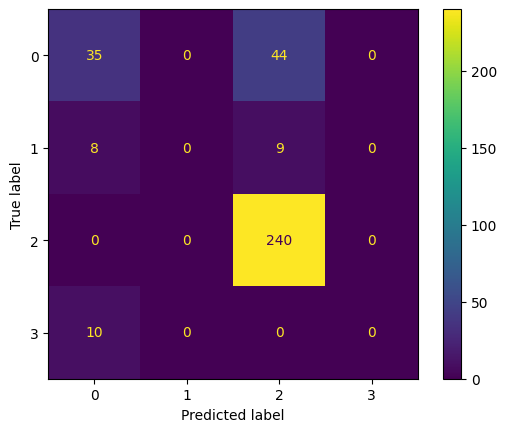

In [19]:
score_test_forest, score_train_forest, mean_forest, score_test_forest_best, score_train_forest_best, mean_forest_best = run_random_forest_model(X, y)
print(f'score_test = {score_test_forest},best_score_test = {score_test_forest_best}, score_train = {score_train_forest}, best_score_train = {score_train_forest_best}, BEST_MEAN = {mean_forest_best}, MEAN = {mean_forest}')

CONCLUSIONES
es necesario utilizar los hiper-parametros para encontrar el mejor modelo, si analizamos el inicial con 10 arboles nos damos cuenta que el modelo tiene overfitting al tener score superior al 90%, al modificar los hiperparametros encontramos un modelo mas optimo que generaliza los datos con un score de 85%.

<h2>KNN vecino mas cercano</h2>

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

def run_knn_model(X, y):
  n_neighbors = 7
  train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0, train_size=0.8, test_size=0.2)
  knn = KNeighborsClassifier(n_neighbors)
  knn.fit(train_X, train_y)
  score_train_vecino = knn.score(train_X, train_y)
  score_test_vecino = knn.score(val_X, val_y)
  pred = knn.predict(val_X)
  y_pred = knn.predict(val_X)
  mean_vecino = mean_absolute_error(val_y, y_pred)
  #mean_knn = mean_absolute_error(val_y, y_pred)
  cm = confusion_matrix(val_y, y_pred)
  ConfusionMatrixDisplay(confusion_matrix=cm).plot();
  return score_train_vecino, score_test_vecino, mean_vecino

score_test = 0.9277456647398844, score_train = 0.9659913169319826, MEAN = 0.12716763005780346


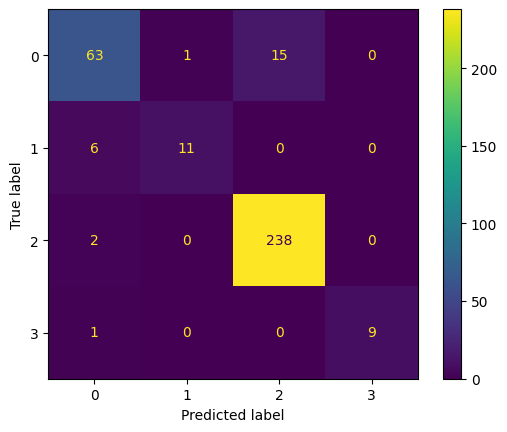

In [21]:
score_train_vecino, score_test_vecino, mean_vecino = run_knn_model(X, y)
print(f'score_test = {score_test_vecino}, score_train = {score_train_vecino}, MEAN = {mean_vecino}')

**Conclusiones**: Es el modelo más eficiente para resolver este problema, puesto que obtenemos un score en el testing del 92.77% y un error absoluto medio de 0.127.<br>
Estos valores son eficientes puesto que son generados desde una data distinta a la que se entrena el modelo.<br>
Además, entendiendo el modelo KNN que está diseñado para realizar tareas de clasificación enfocadas a las recomendaciones.